In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection, ensemble, linear_model, metrics
from sklearn.metrics import roc_auc_score,roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score

In [ ]:
test_result_old = pd.read_parquet(r'test_result.parquet', engine='fastparquet')
train_result_old = pd.read_parquet(r'train_result.parquet', engine='fastparquet') 

In [ ]:
test_result_old

dataset method                                               text  \
0          archiv  chief  \nThe isotony axiom is natural because we have...   
1          archiv  chief  \nIn the usual situation, all the von Neumann ...   
2          archiv  chief  \nAt the end of this section, we compare our f...   
3          archiv  chief  \nBoth of one (unitary) vertex operator algebr...   
4          archiv  chief  \nFor nets of factors, we have introduced a ne...   
...           ...    ...                                                ...   
257450  wikipedia   spin  "Dead Man's Chest" was discharged in the Unite...   
257451  wikipedia   spin  The wedding of Will Turner and Elizabeth Swann...   
257452  wikipedia   spin  Will discovers Jack and the group on an island...   
257453  wikipedia   spin  In Tortuga, Jack enlists another group, includ...   
257454  wikipedia   spin  Jack arranges the survivors to forsake transpo...   

        label  SimCSE  SimCSE_roberta  DiffCSE  DiffCSE_roberta  
0           0   0.500           0.470    0.595            0.710  
1           0   0.280           0.375    0.770            0.360  
2           0   0.355           0.420    0.475            0.325  
3           0   0.595           0.475    0.670            0.685  
4           0   0.485           0.590    0.590            0.390  
...       ...     ...             ...      ...              ...  
257450      1   0.745           0.695    0.825            0.950  
257451      1   0.460           0.560    0.485            0.730  
257452      1   0.395           0.560    0.445            0.545  
257453      1   0.500           0.640    0.585            0.755  
257454      1   0.595           0.525    0.540            0.790  

[257455 rows x 8 columns]

In [ ]:
dataset = test_result_old['dataset'].unique()
method = test_result_old['method'].unique()
all_couple = []
for dat in dataset:
    for met in method:
        all_couple+=[[dat,met]]

In [ ]:
def confuns_matrix_double(train_rezalt_old,name):
    train_rezalt_old = train_rezalt_old.loc[(train_rezalt_old['dataset']==name[0])&
                                           (train_rezalt_old['method']==name[1])]
    for i in train_rezalt_old.columns[4:]:
        print(f'f1 for {i} for {name}')
        print(f1_score(train_rezalt_old['label'].tolist(), [int(p>0.5) for p in train_rezalt_old[i]], average='macro'))
        sns.heatmap(metrics.confusion_matrix(train_rezalt_old['label'],[int(p>0.5) for p in train_rezalt_old[i]]),annot=True,cmap="Blues",square=True)
        plt.ylabel("label")
        plt.xlabel(f"{i}")
        plt.title(f"Confusion matrix {i} for {name}")
        plt.show()

In [ ]:
def roc_double(test_result_old,name):
    test_result_old = test_result_old.loc[(test_result_old['dataset']==name[0])&
                                           (test_result_old['method']==name[1])]    
    for i in test_result_old.columns[4:]:
        fpr, tpr, treshold = roc_curve(test_result_old['label'], test_result_old[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
             label=f'ROC {i} for {name} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Совмещенные ROC-кривые for {name}')
        plt.legend(loc="lower right")
    plt.show()

In [ ]:
def roc_sep_doudle(test_result_old,name):
    test_result_old = test_result_old.loc[(test_result_old['dataset']==name[0])&
                                           (test_result_old['method']==name[1])]    
    for i in test_result_old.columns[4:]:
        fpr, tpr, treshold = roc_curve(test_result_old['label'], test_result_old[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
             label=f'ROC {i} for {name} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if method is not None:
            plt.title(f'{i} for  = {name}')
        else:
            plt.title(f'{i}')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
def confuns_matrix(train_rezalt_old,method = None,name = None):
    if method is not None:
        train_rezalt_old = train_rezalt_old.loc[train_rezalt_old[method]==name]
    for i in train_rezalt_old.columns[4:]:
        print(f'f1 for {i}')
        print(f1_score(train_rezalt_old['label'].tolist(), [int(p>0.5) for p in train_rezalt_old[i]], average='macro'))
        sns.heatmap(metrics.confusion_matrix(train_rezalt_old['label'],[int(p>0.5) for p in train_rezalt_old[i]]),annot=True,cmap="Blues",square=True)
        plt.ylabel("label")
        plt.xlabel(f"{i}")
        if method is not None:
            plt.title(f"Confusion matrix {i} for {method} = {name}")
        else:
            plt.title(f"Confusion matrix {i}")
        plt.show()

In [ ]:
def roc(test_result_old,method = None,name = None):
    if method is not None:
        test_result_old = test_result_old.loc[test_result_old[method]==name]    
    for i in test_result_old.columns[4:]:
        fpr, tpr, treshold = roc_curve(test_result_old['label'], test_result_old[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
             label=f'ROC {i} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if method is not None:
            plt.title(f'Совмещенные ROC-кривые for {method} = {name}')
        else:
            plt.title('Совмещенные ROC-кривые')
        plt.legend(loc="lower right")
    plt.show()

In [ ]:
def roc_sep(test_result_old,method = None,name = None):
    if method is not None:
        test_result_old = test_result_old.loc[test_result_old[method]==name]
    for i in test_result_old.columns[4:]:
        fpr, tpr, treshold = roc_curve(test_result_old['label'], test_result_old[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
             label=f'ROC {i} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if method is not None:
            plt.title(f'{i} for {method} = {name}')
        else:
            plt.title(f'{i}')
        plt.legend(loc="lower right")
        plt.show()

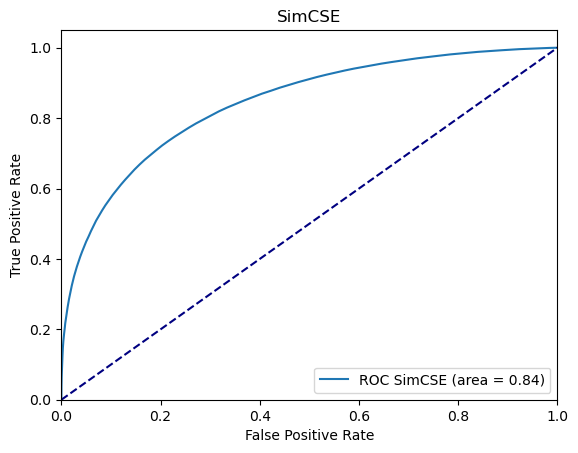

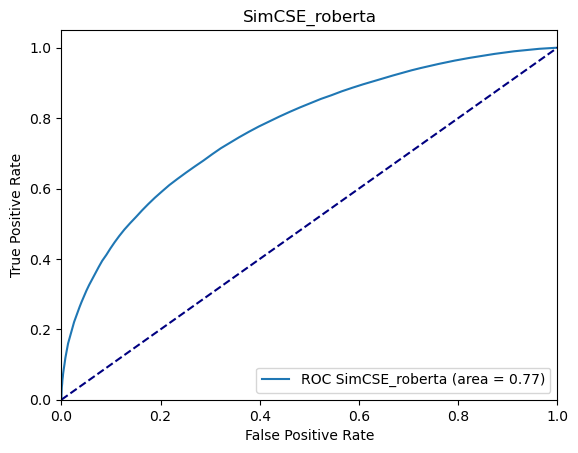

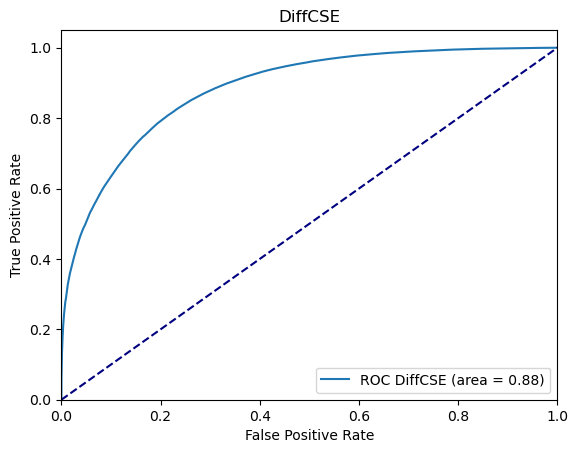

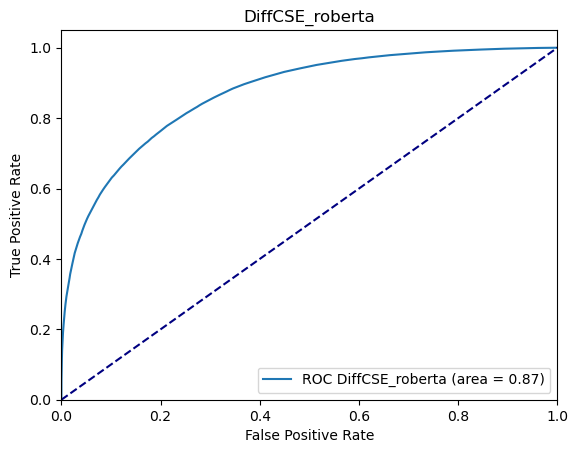

In [ ]:
roc_sep(test_result_old)

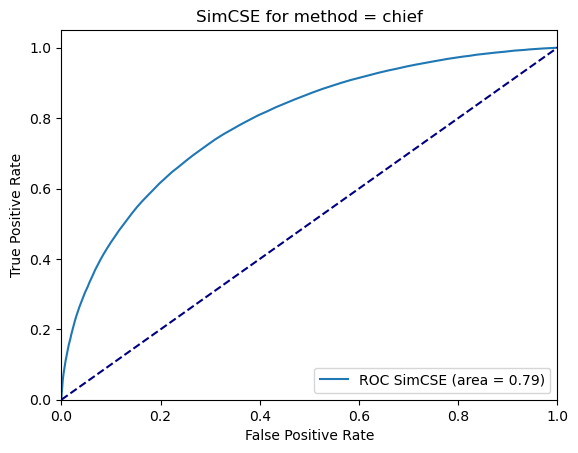

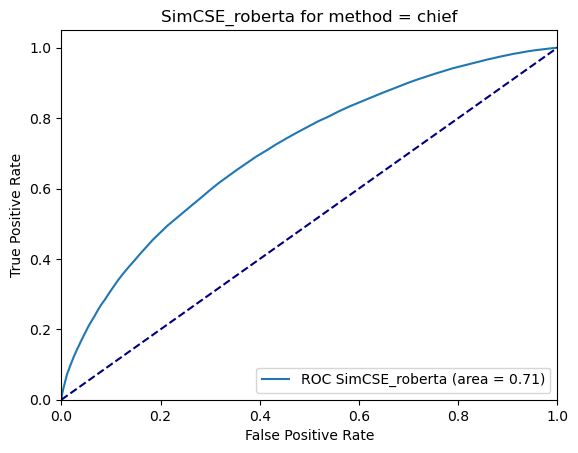

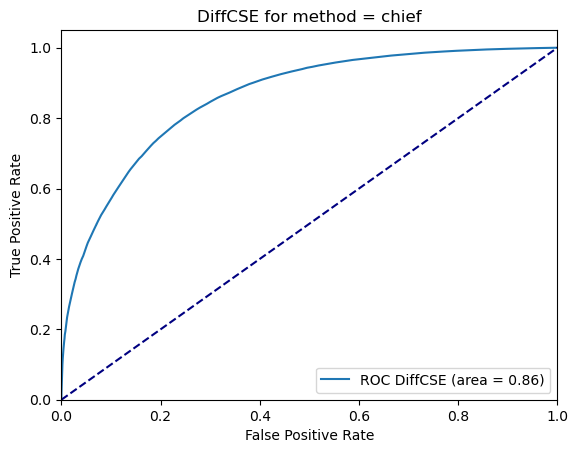

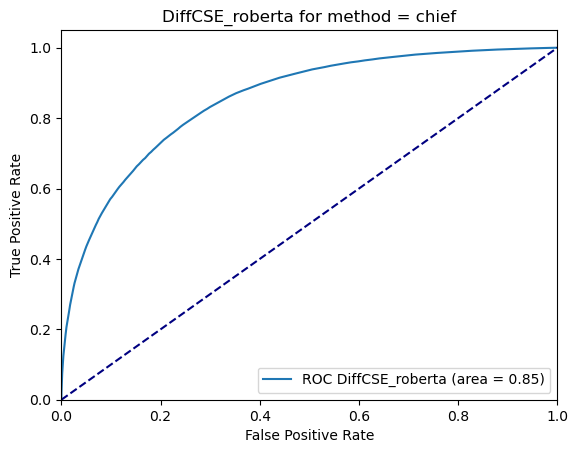

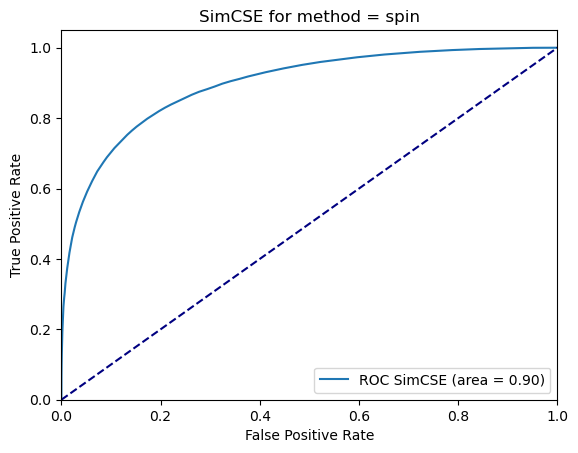

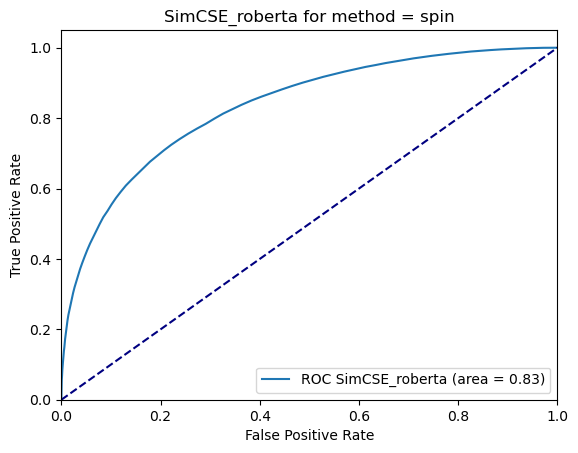

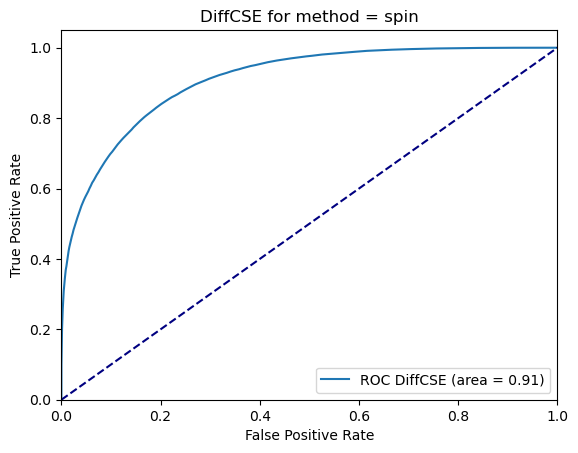

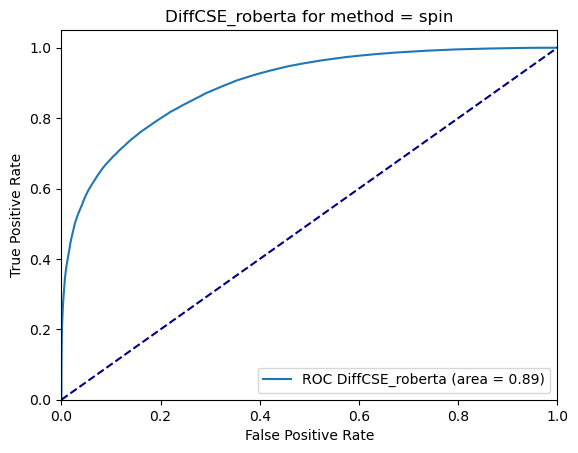

In [ ]:
for method in test_result_old['method'].unique():
    roc_sep(test_result_old,'method',method)

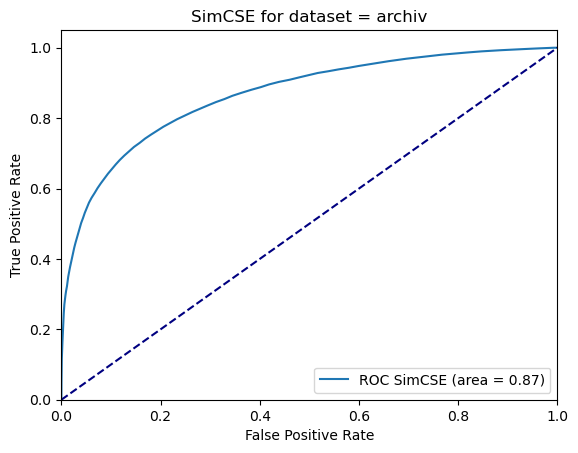

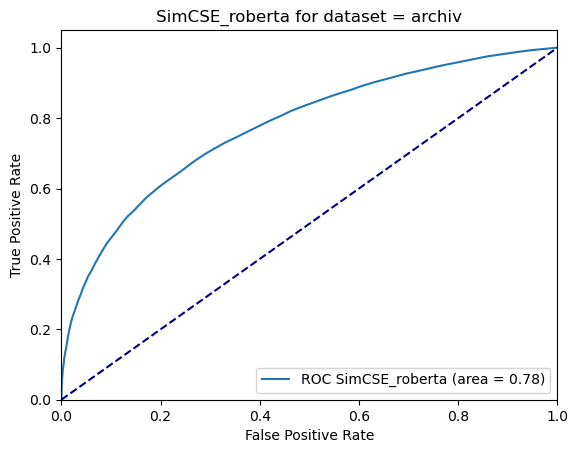

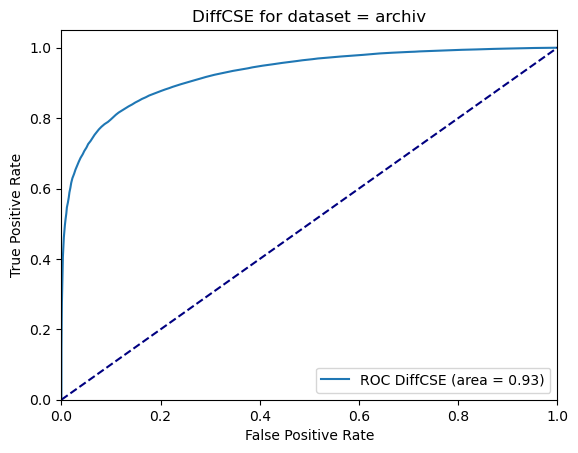

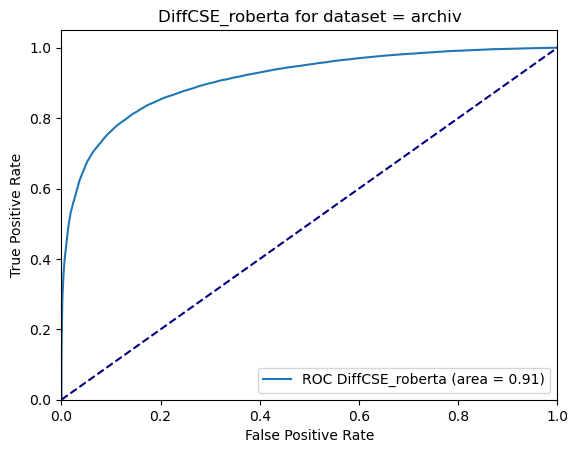

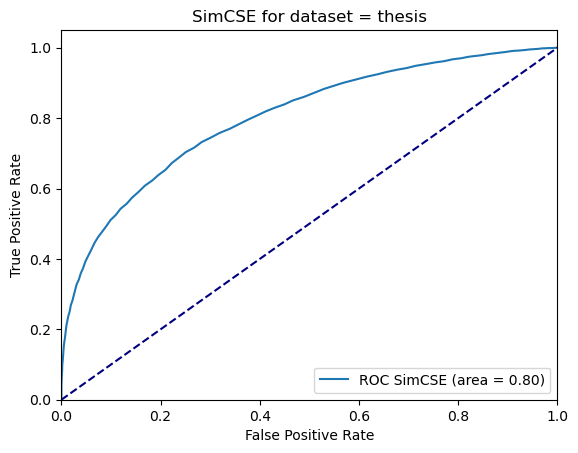

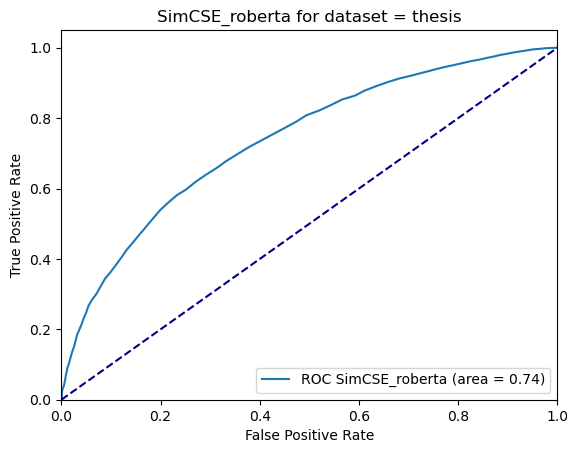

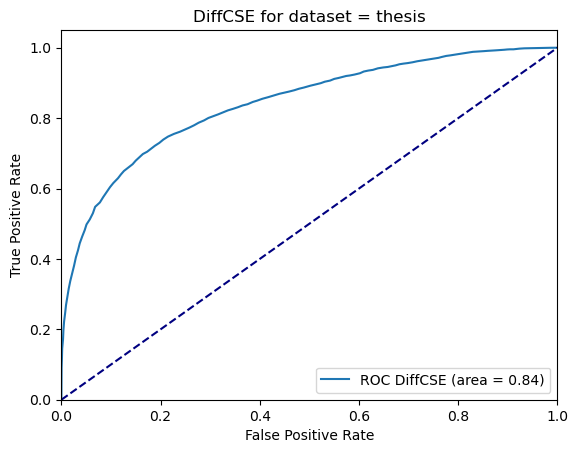

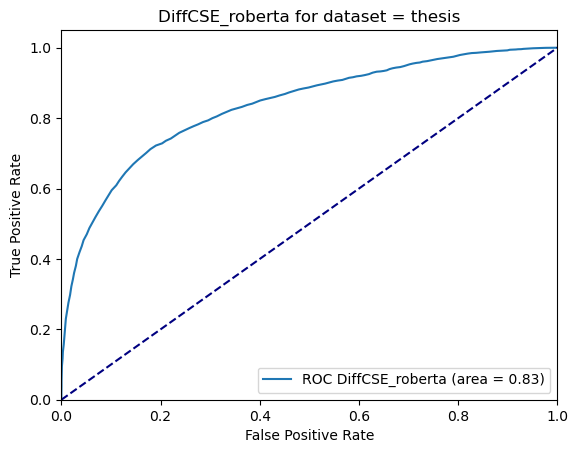

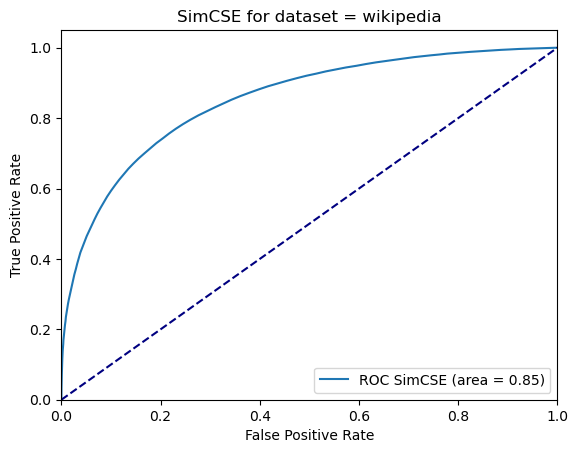

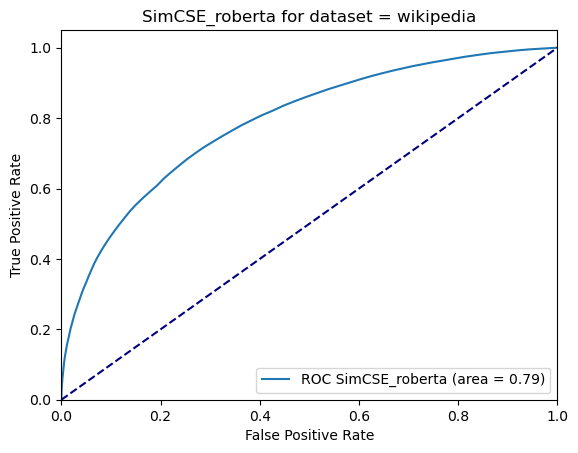

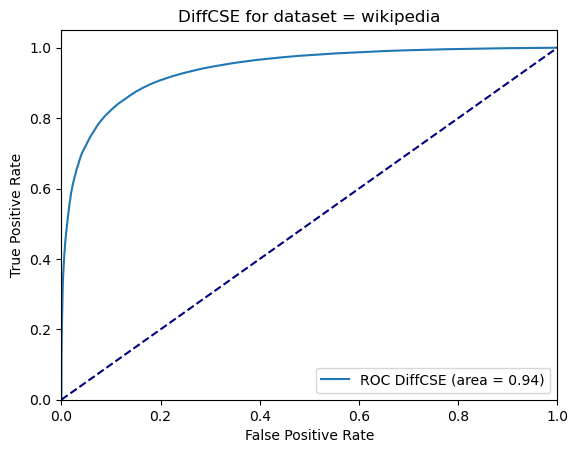

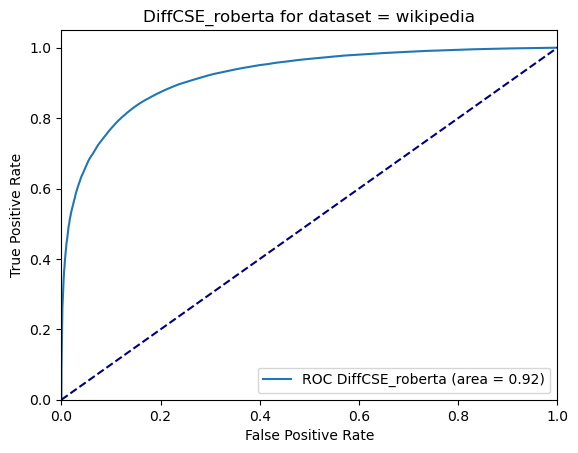

In [ ]:
for dataset in test_result_old['dataset'].unique():
    roc_sep(test_result_old,'dataset',dataset)

f1 for SimCSE
0.7593847131788183


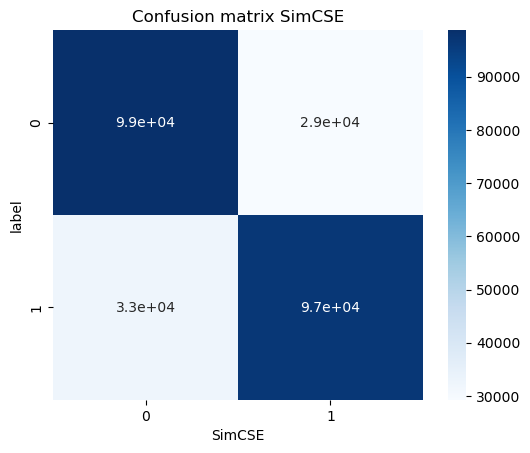

f1 for SimCSE_roberta
0.6967208178491716


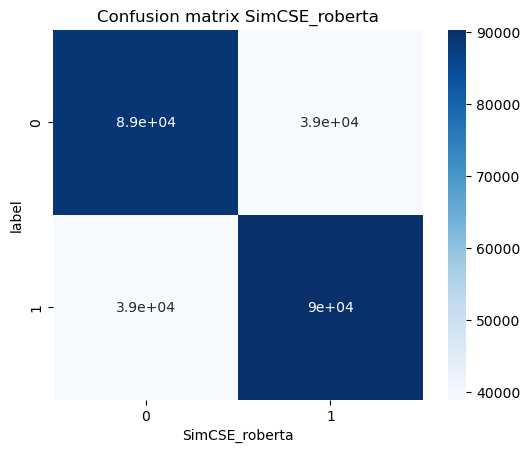

f1 for DiffCSE
0.793342944151699


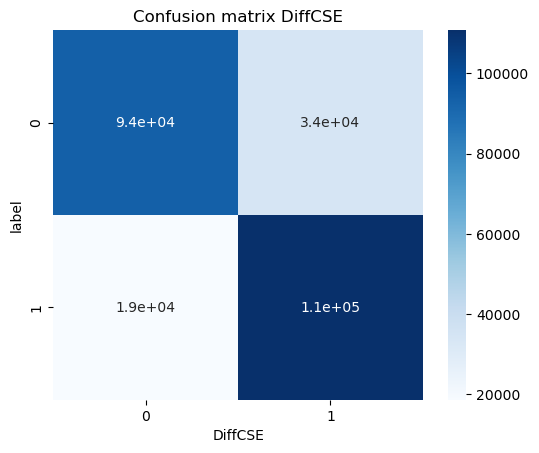

f1 for DiffCSE_roberta
0.7808624189519031


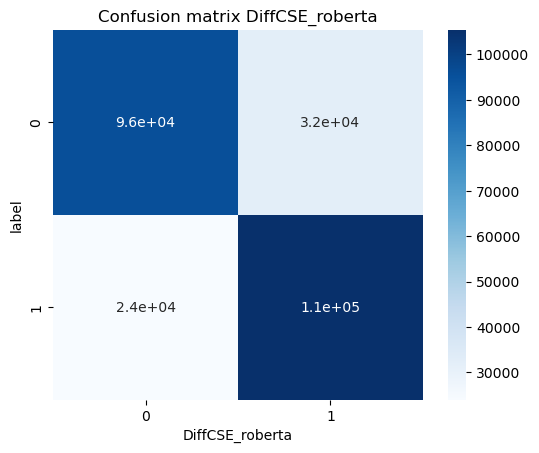

In [ ]:
confuns_matrix(test_result_old)

f1 for SimCSE
0.7101766096190123


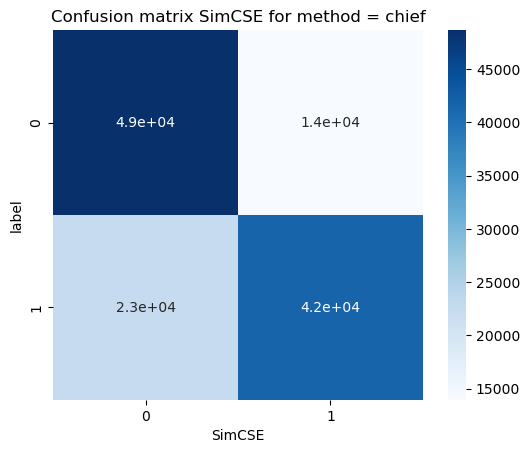

f1 for SimCSE_roberta
0.6465572573232405


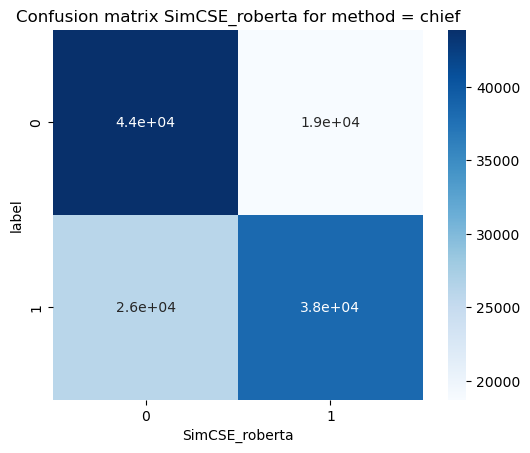

f1 for DiffCSE
0.7763696090448273


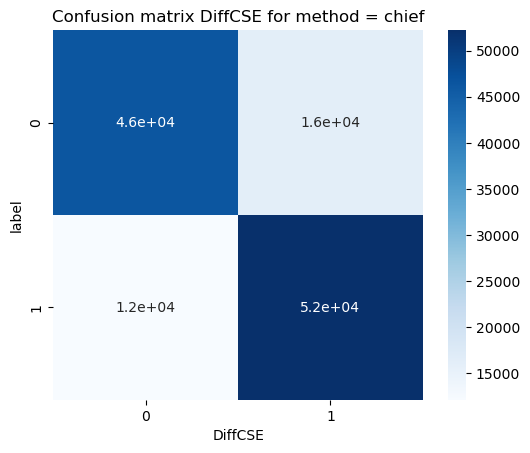

f1 for DiffCSE_roberta
0.7679050241989673


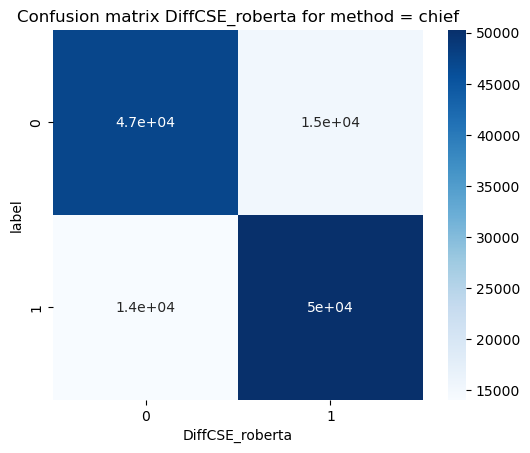

f1 for SimCSE
0.8061327237556949


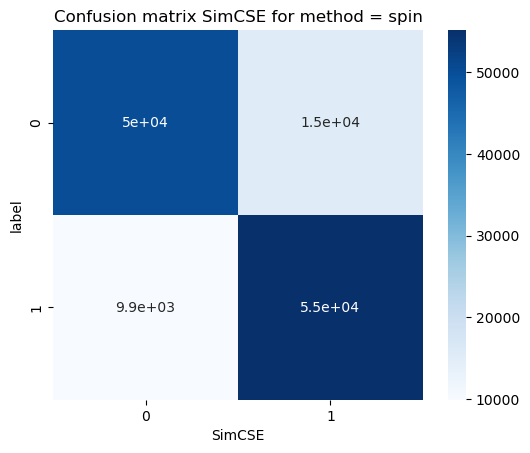

f1 for SimCSE_roberta
0.7441905451420718


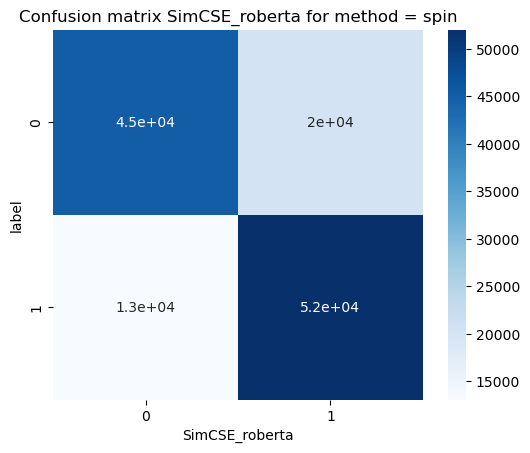

f1 for DiffCSE
0.809779174399301


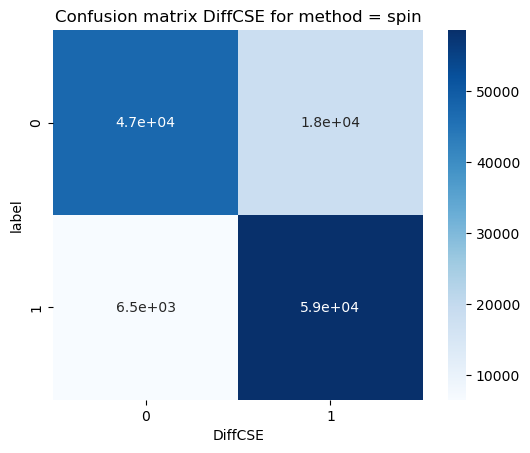

f1 for DiffCSE_roberta
0.7934148047862573


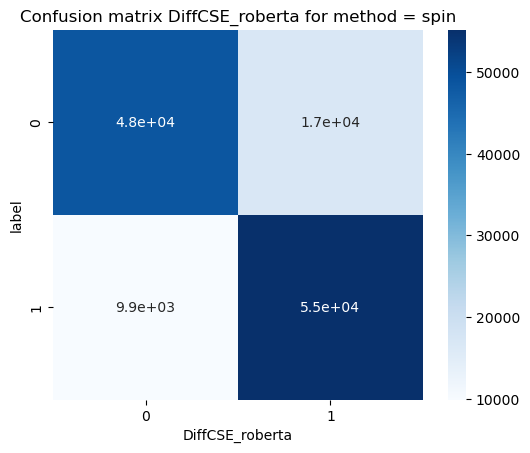

In [ ]:
for method in test_result_old['method'].unique():
    confuns_matrix(test_result_old,'method',method)

f1 for SimCSE
0.7659255342717837


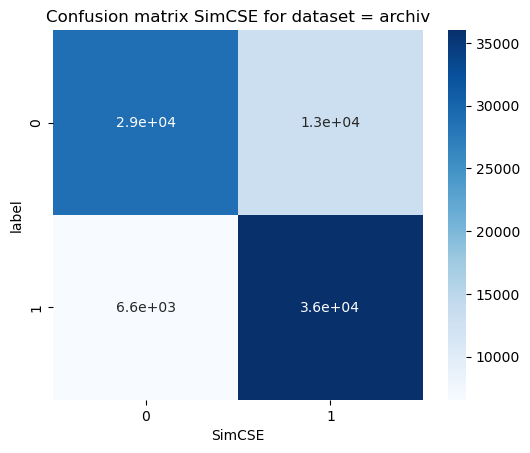

f1 for SimCSE_roberta
0.6773121520008817


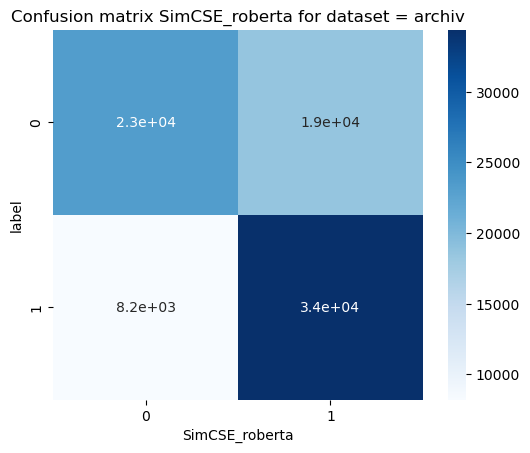

f1 for DiffCSE
0.6970208707379177


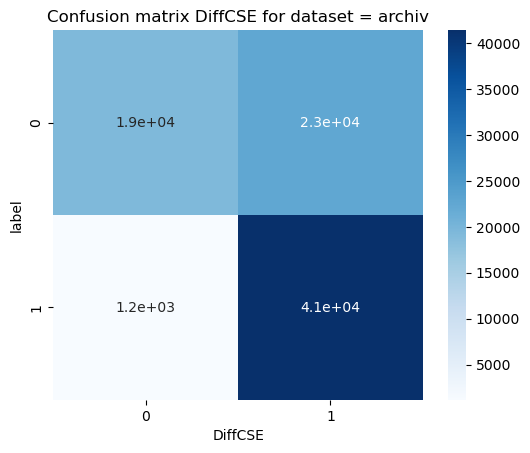

f1 for DiffCSE_roberta
0.7125835695205478


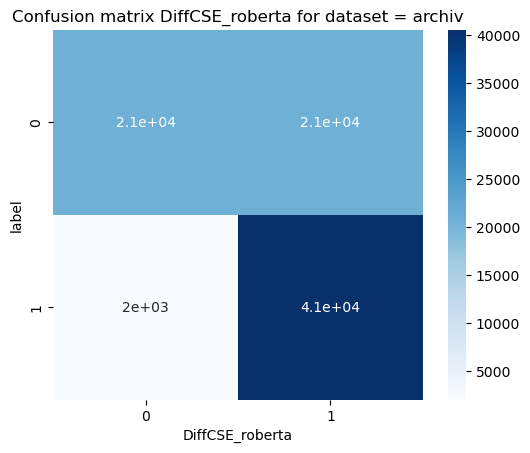

f1 for SimCSE
0.6514138366821414


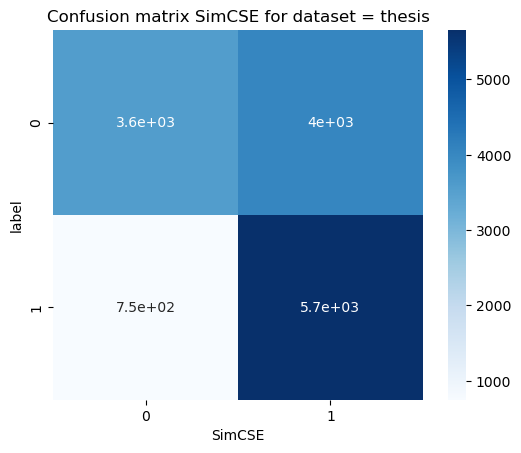

f1 for SimCSE_roberta
0.6235712176759595


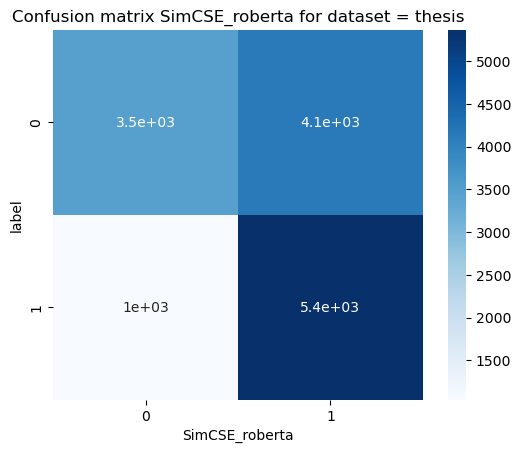

f1 for DiffCSE
0.532496231516633


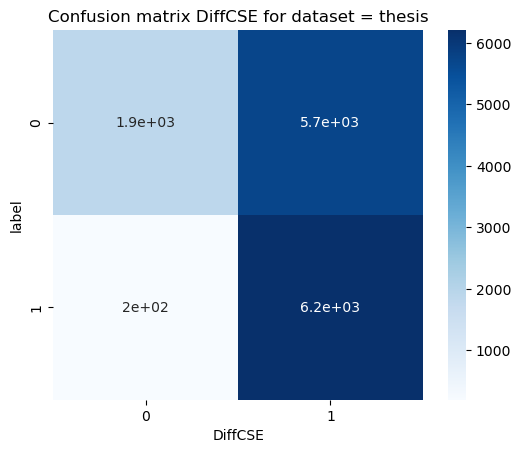

f1 for DiffCSE_roberta
0.5708704562278754


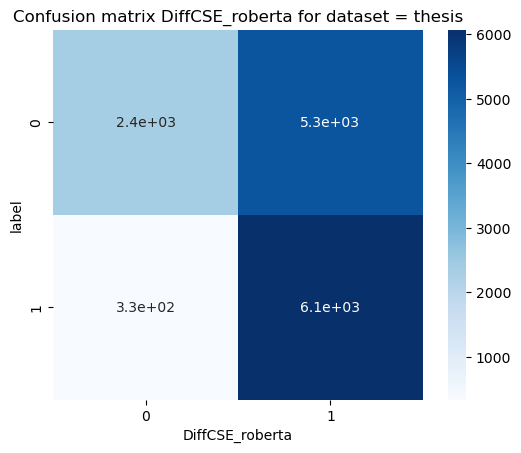

f1 for SimCSE
0.7627041141635725


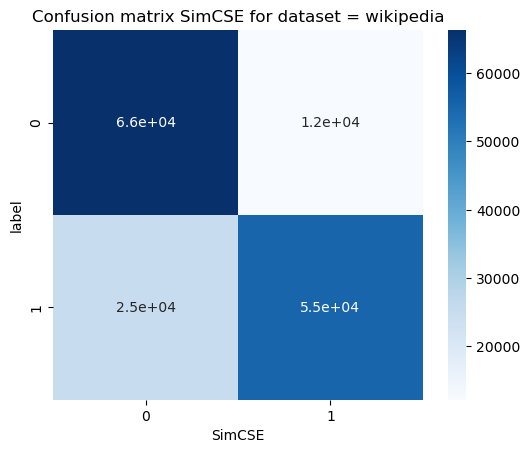

f1 for SimCSE_roberta
0.7083757404926047


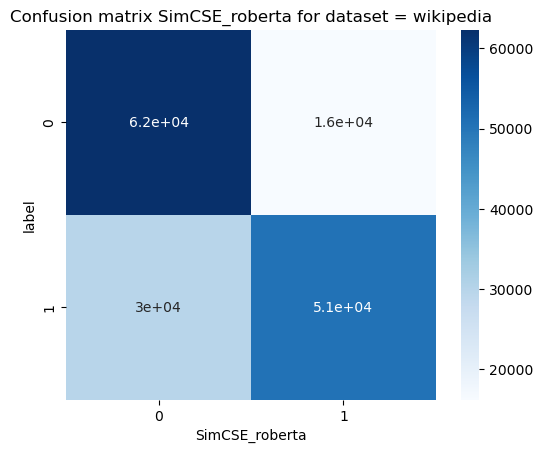

f1 for DiffCSE
0.8535218914892311


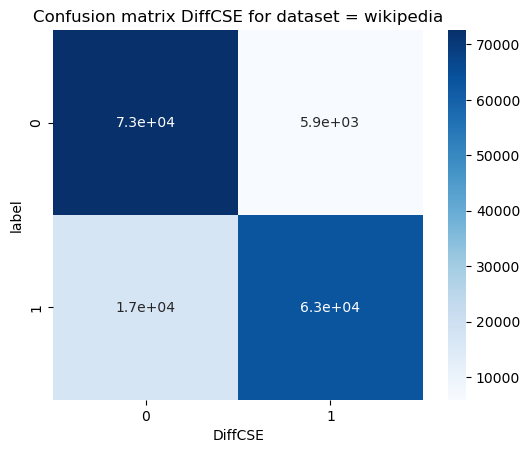

f1 for DiffCSE_roberta
0.8239947620252843


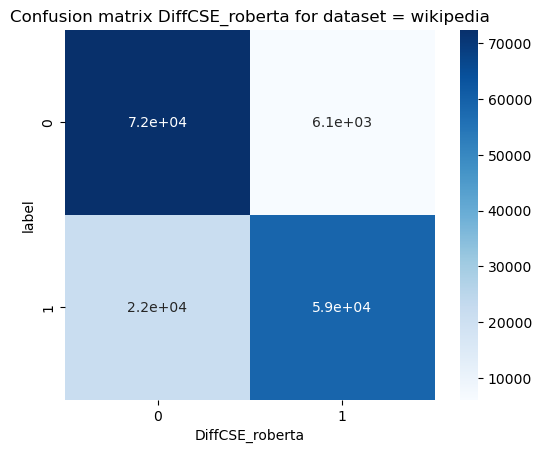

In [ ]:
for dataset in test_result_old['dataset'].unique():
    confuns_matrix(test_result_old,'dataset',dataset)

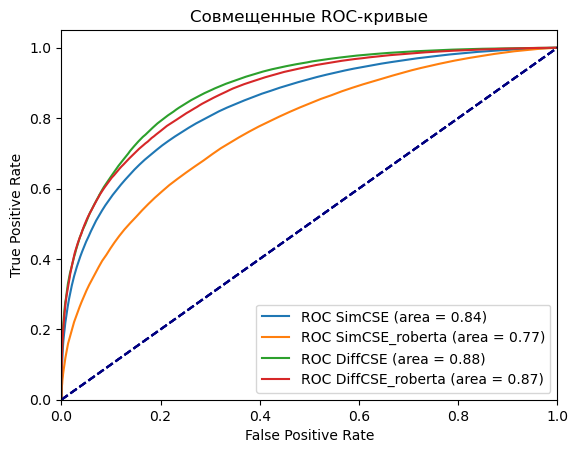

In [ ]:
roc(test_result_old)

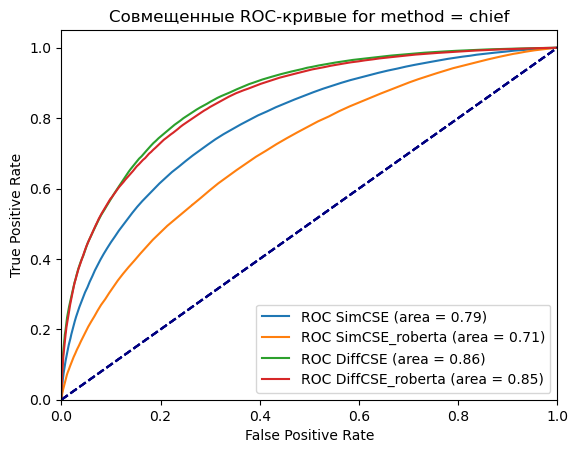

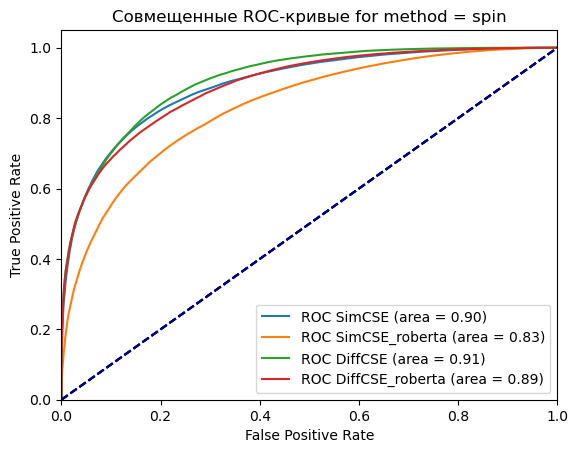

In [ ]:
for method in test_result_old['method'].unique():
    roc(test_result_old,'method',method)

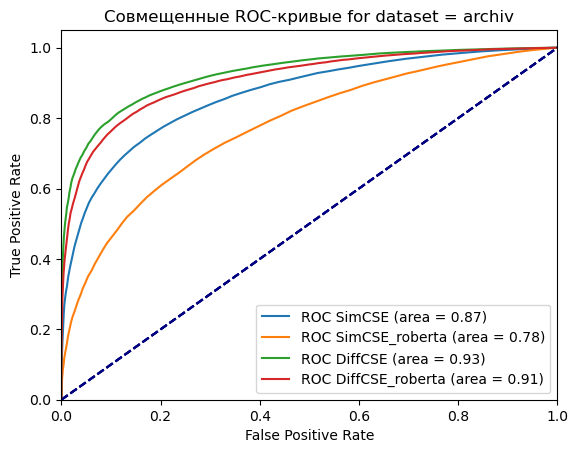

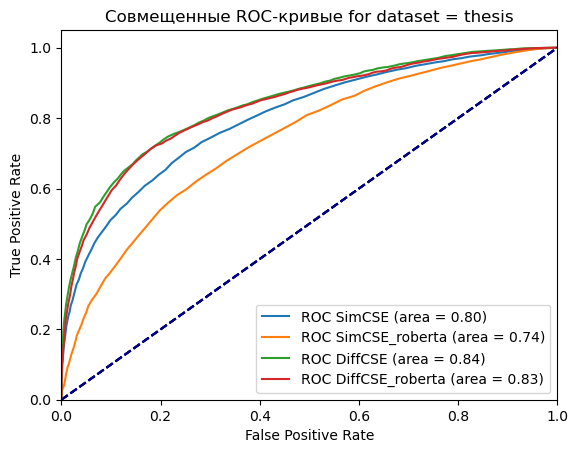

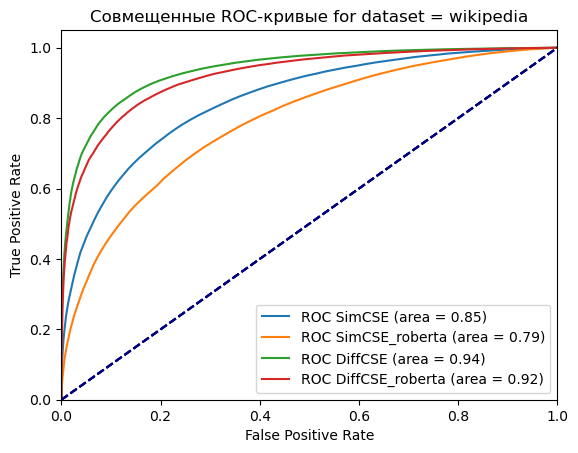

In [ ]:
for dataset in test_result_old['dataset'].unique():
    roc(test_result_old,'dataset',dataset)

f1 for SimCSE for ['archiv', 'chief']
0.7135200456025168


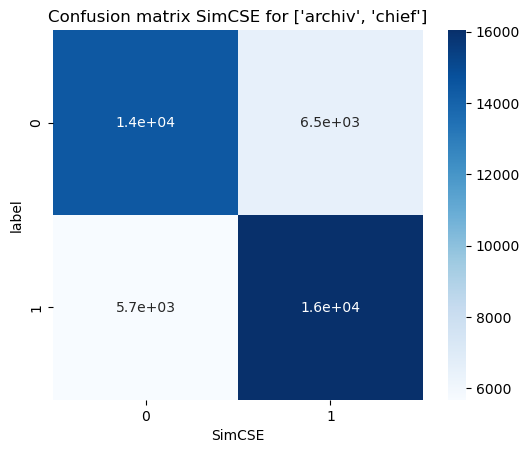

f1 for SimCSE_roberta for ['archiv', 'chief']
0.6310885192557436


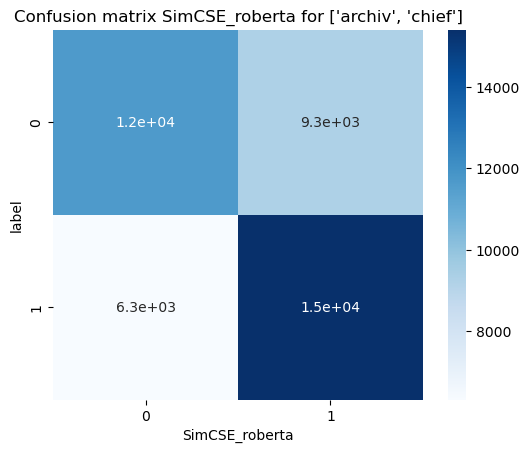

f1 for DiffCSE for ['archiv', 'chief']
0.6887085652366529


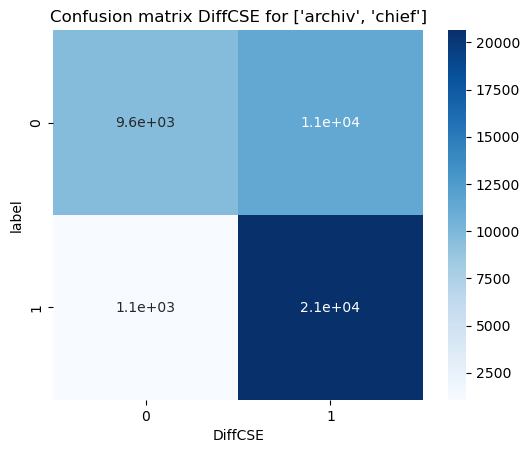

f1 for DiffCSE_roberta for ['archiv', 'chief']
0.7019460594888709


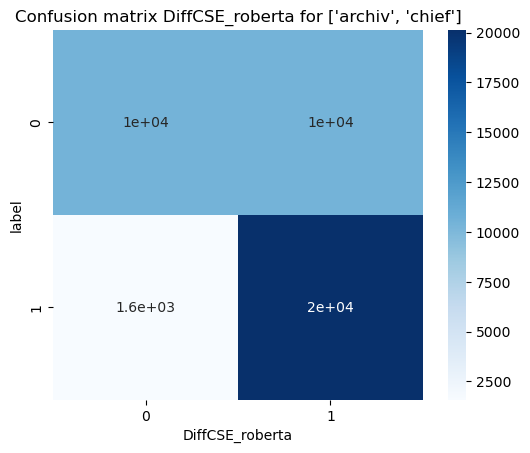

f1 for SimCSE for ['archiv', 'spin']
0.8191964645865385


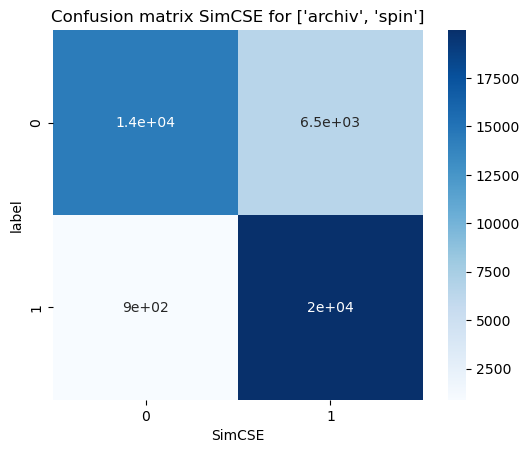

f1 for SimCSE_roberta for ['archiv', 'spin']
0.7243031391090897


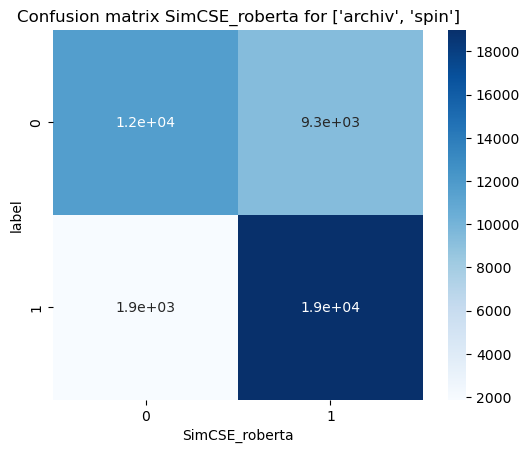

f1 for DiffCSE for ['archiv', 'spin']
0.7055295221359339


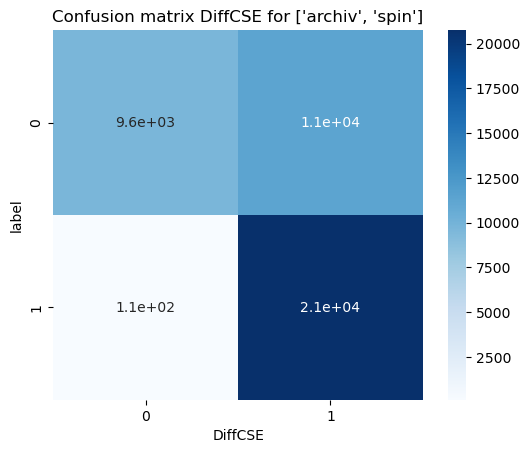

f1 for DiffCSE_roberta for ['archiv', 'spin']
0.7234795532315266


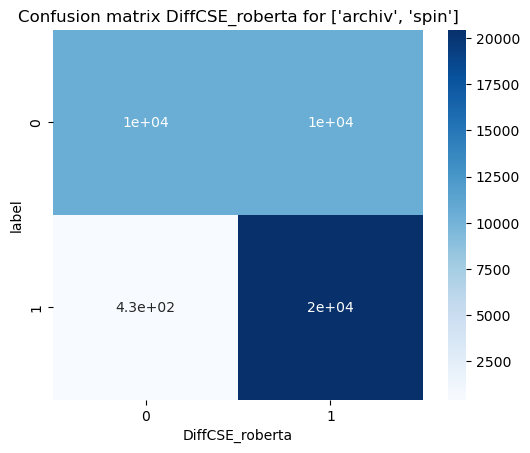

f1 for SimCSE for ['thesis', 'chief']
0.6210191350551519


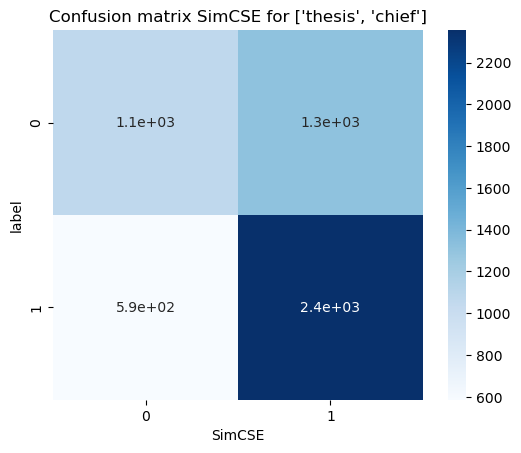

f1 for SimCSE_roberta for ['thesis', 'chief']
0.607360858361389


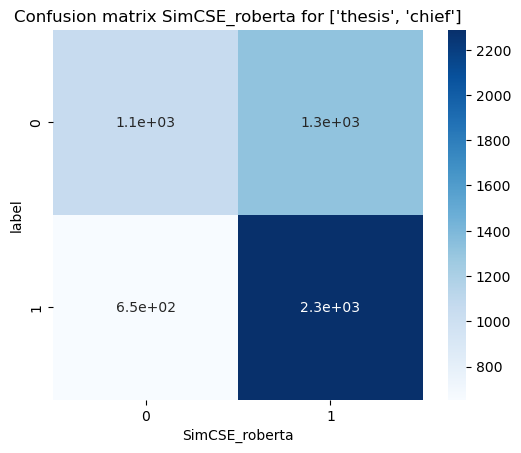

f1 for DiffCSE for ['thesis', 'chief']
0.5252354545263724


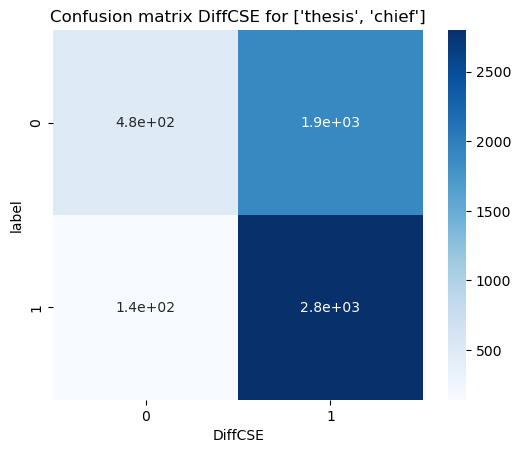

f1 for DiffCSE_roberta for ['thesis', 'chief']
0.5396698795781698


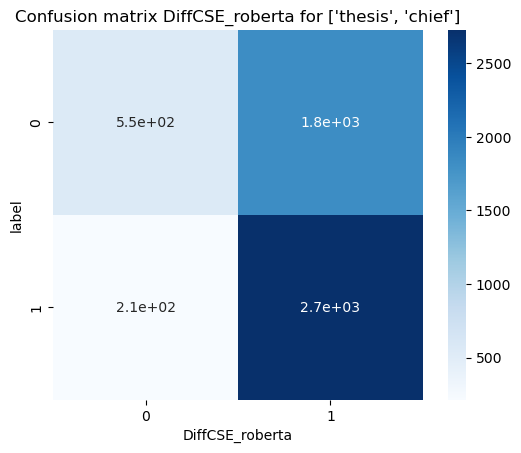

f1 for SimCSE for ['thesis', 'spin']
0.6660228216709716


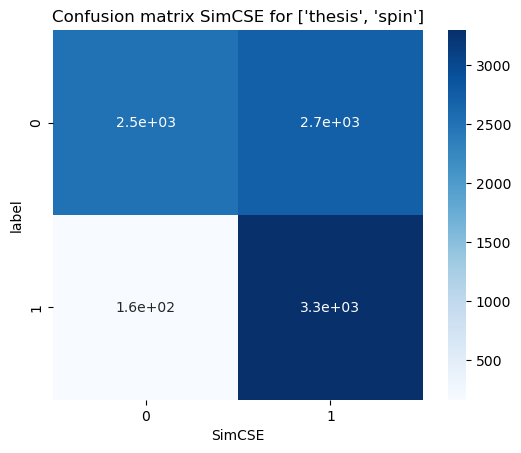

f1 for SimCSE_roberta for ['thesis', 'spin']
0.6295614957120752


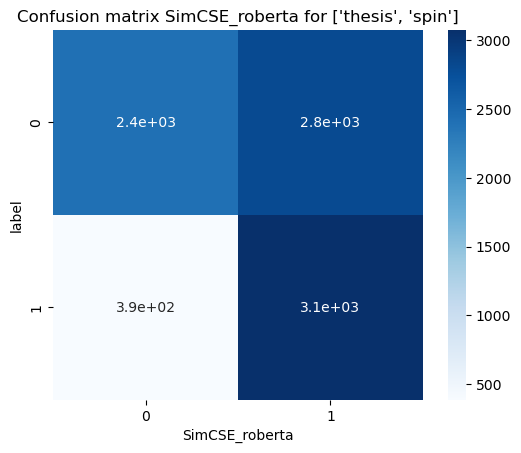

f1 for DiffCSE for ['thesis', 'spin']
0.528428652598993


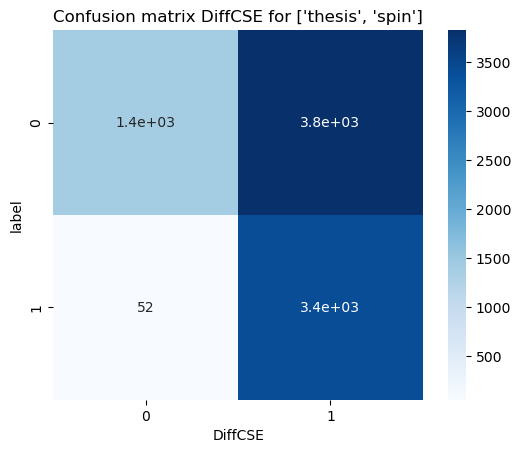

f1 for DiffCSE_roberta for ['thesis', 'spin']
0.5783359751359072


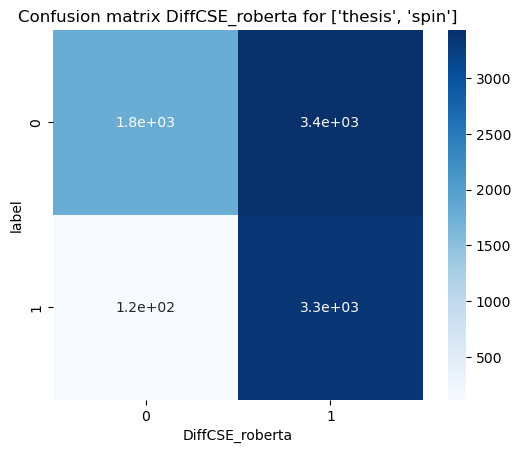

f1 for SimCSE for ['wikipedia', 'chief']
0.7094946950567549


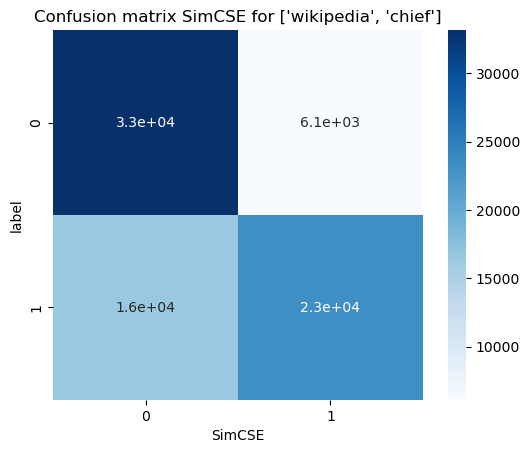

f1 for SimCSE_roberta for ['wikipedia', 'chief']
0.6494936236348023


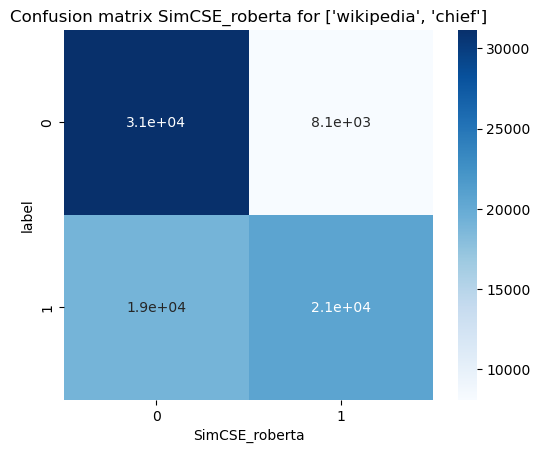

f1 for DiffCSE for ['wikipedia', 'chief']
0.8225271047069523


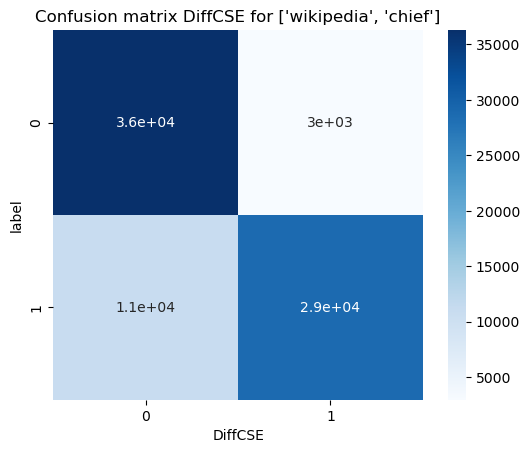

f1 for DiffCSE_roberta for ['wikipedia', 'chief']
0.8032925369572956


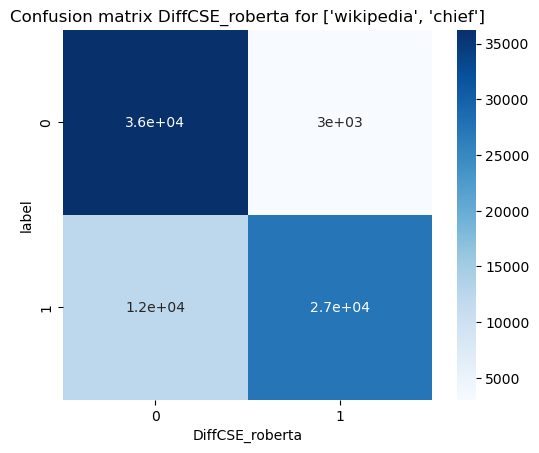

f1 for SimCSE for ['wikipedia', 'spin']
0.8129958936619841


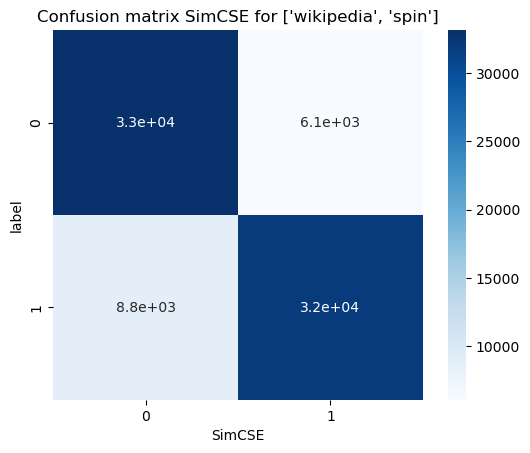

f1 for SimCSE_roberta for ['wikipedia', 'spin']
0.7634701175216239


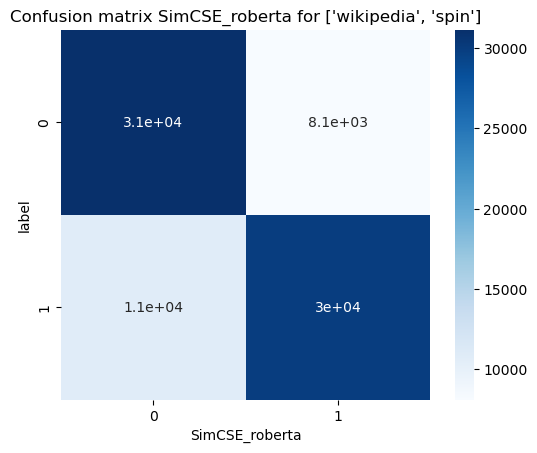

f1 for DiffCSE for ['wikipedia', 'spin']
0.8834913942967126


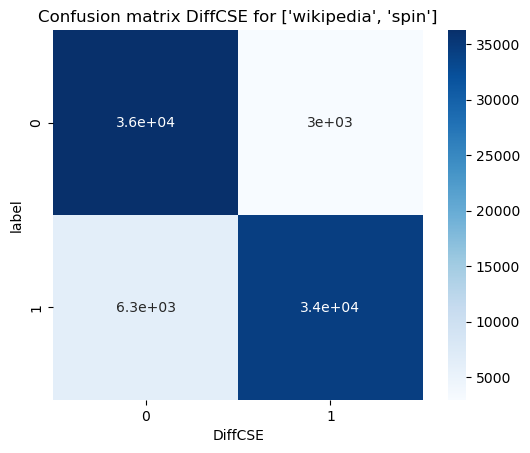

f1 for DiffCSE_roberta for ['wikipedia', 'spin']
0.8440279328768097


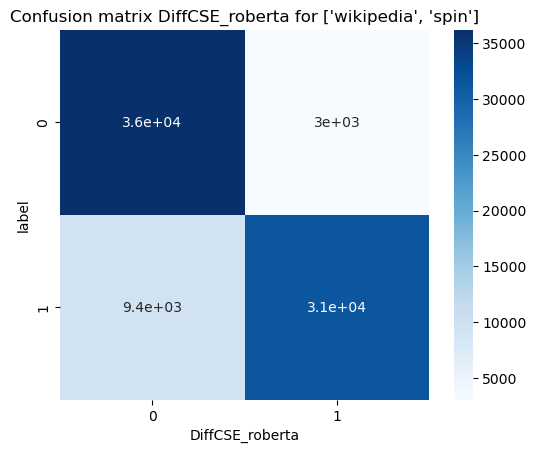

In [ ]:
for method in all_couple:
    confuns_matrix_double(test_result_old,method)

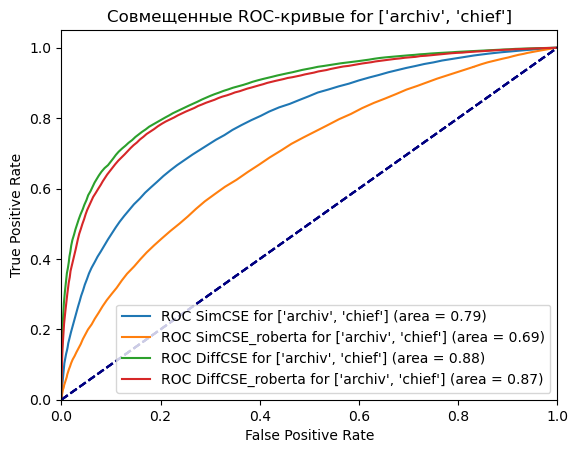

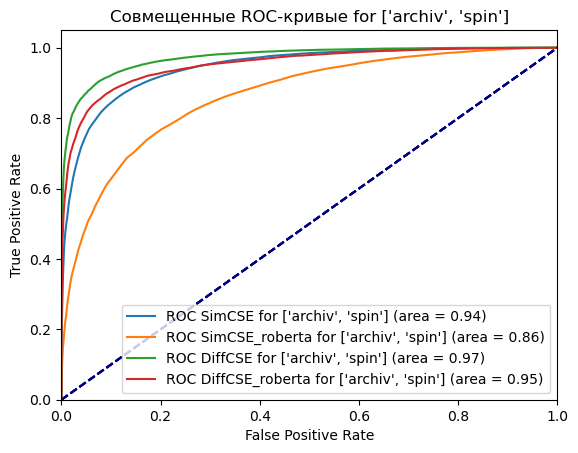

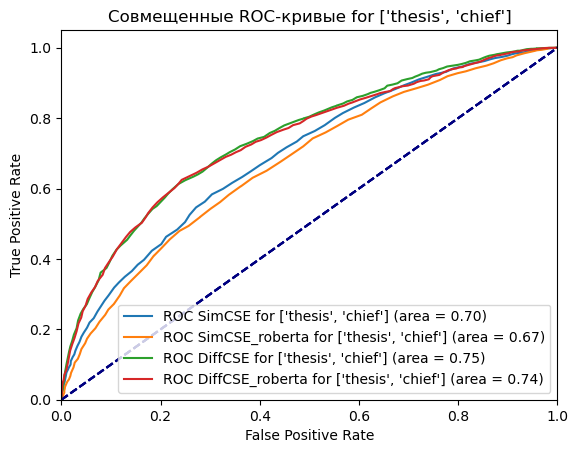

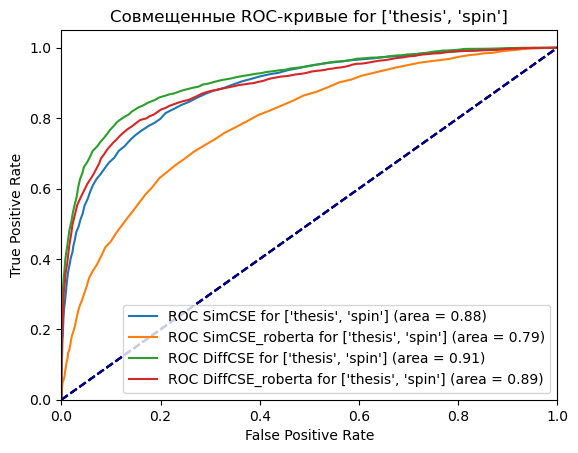

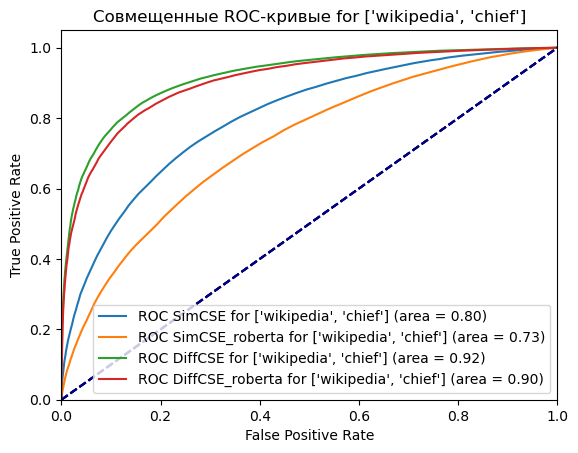

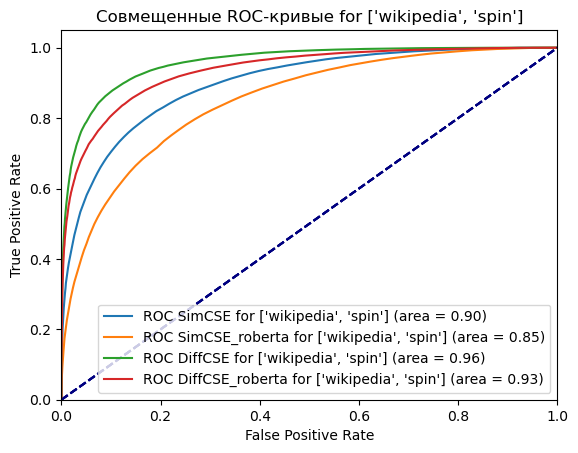

In [ ]:
for method in all_couple:
    roc_double(test_result_old,method)

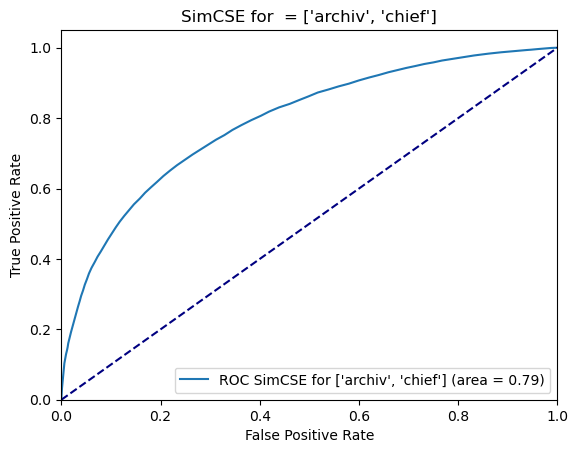

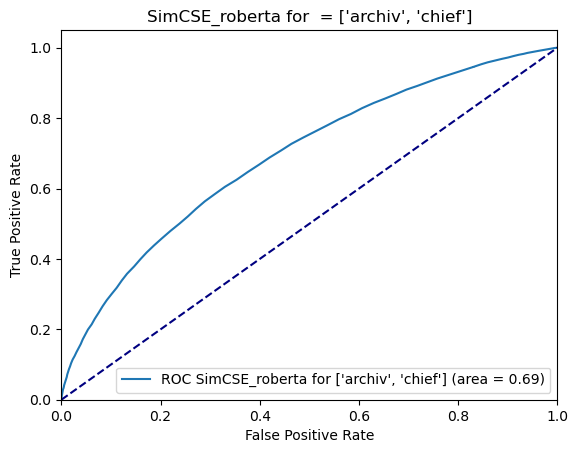

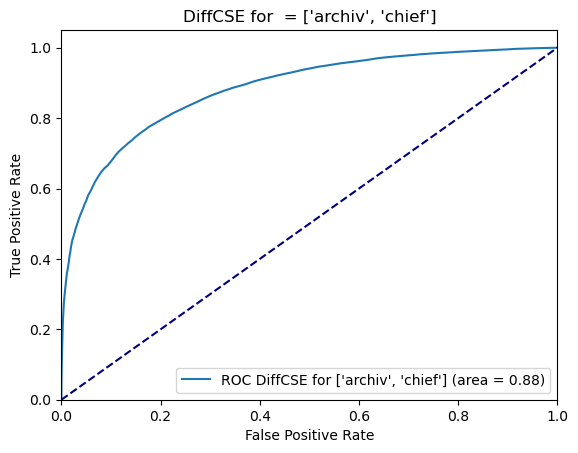

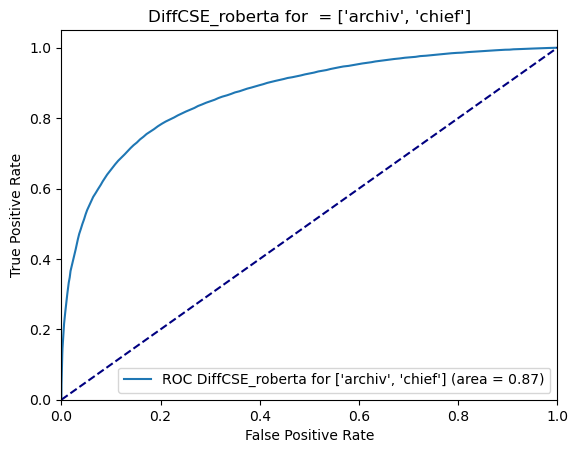

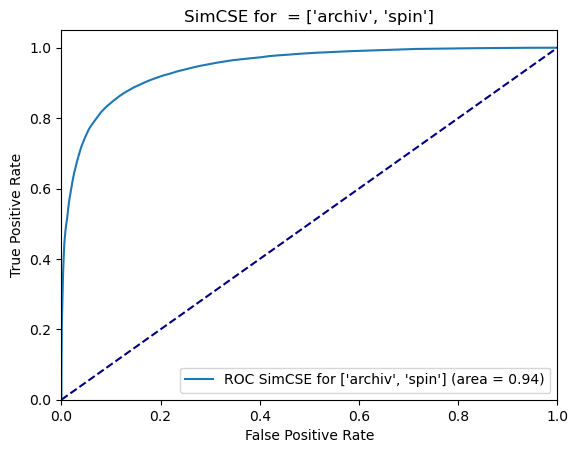

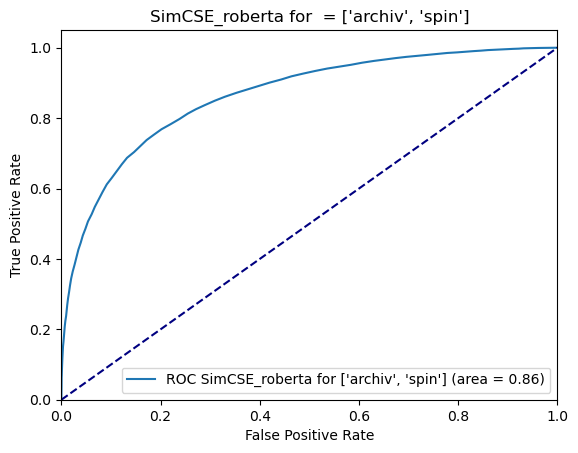

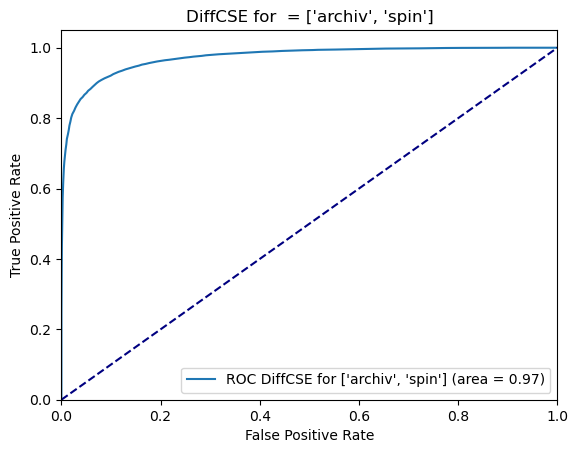

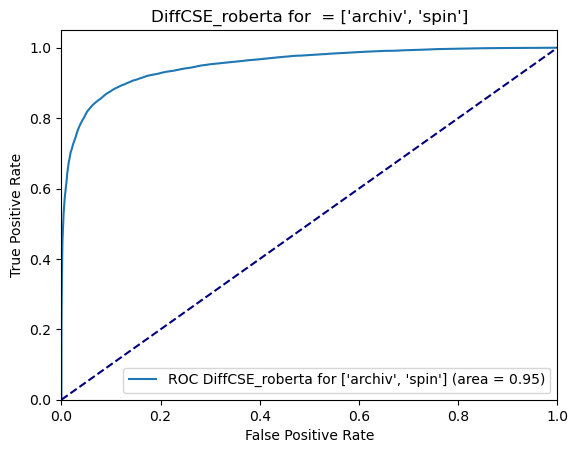

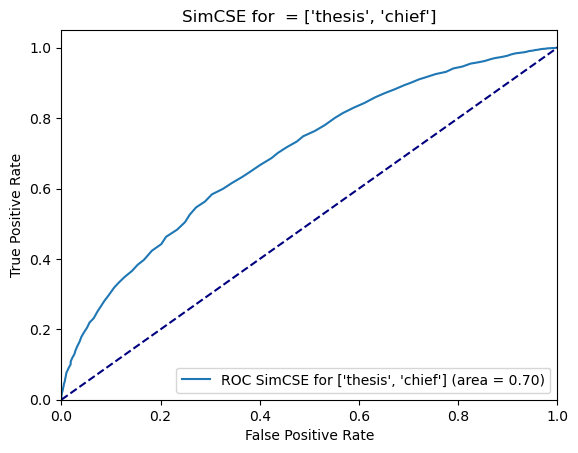

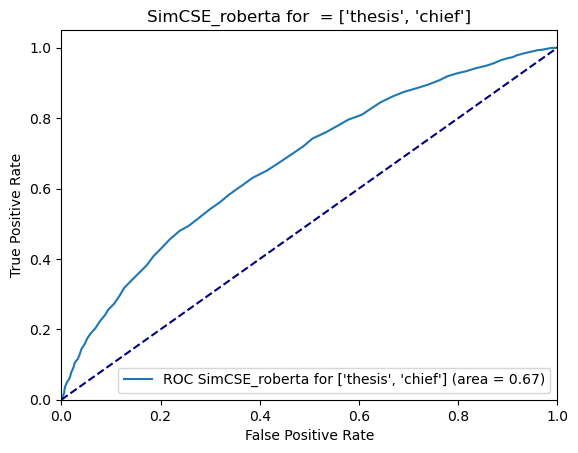

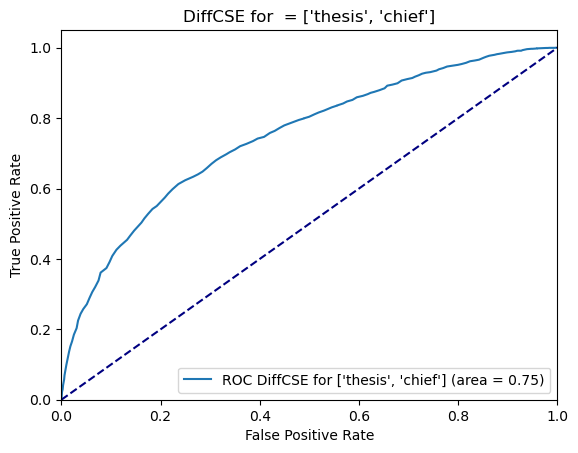

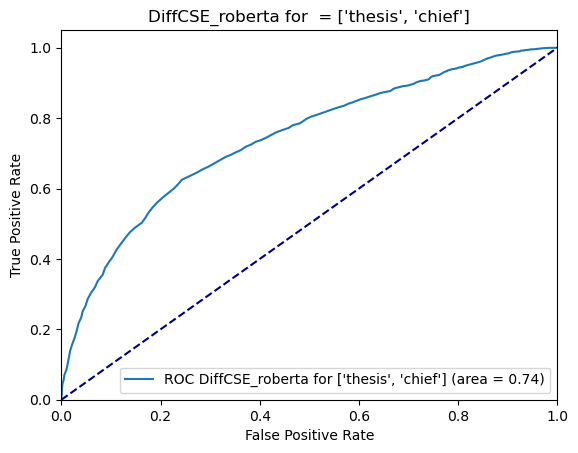

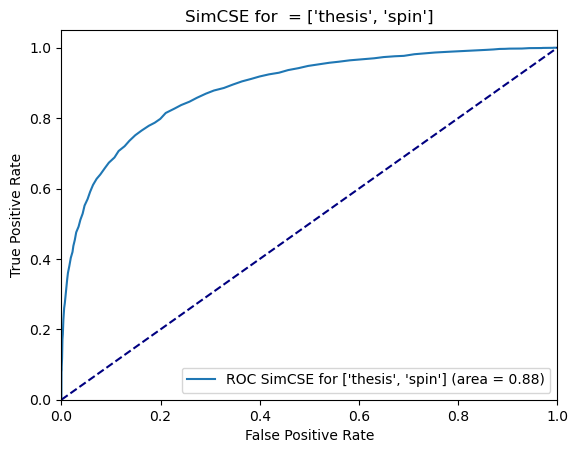

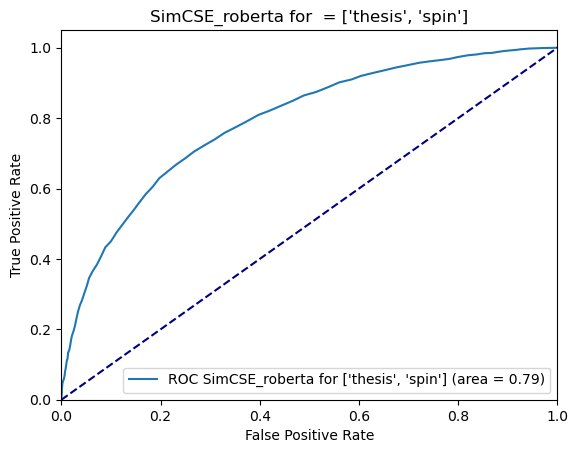

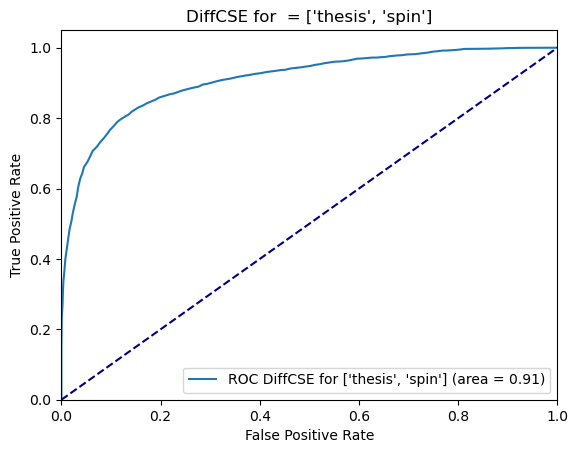

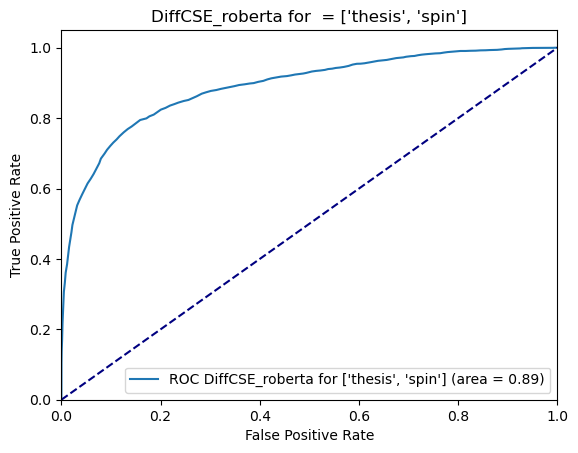

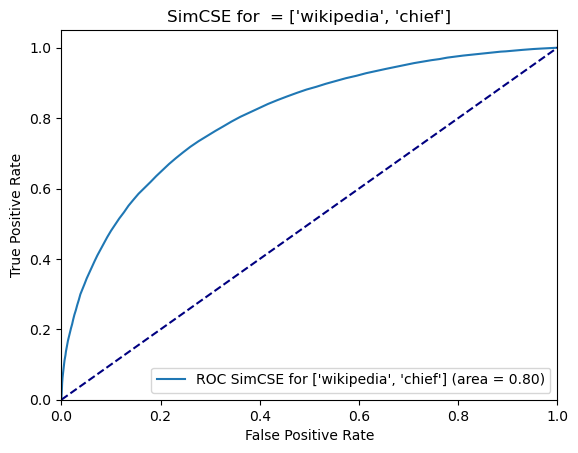

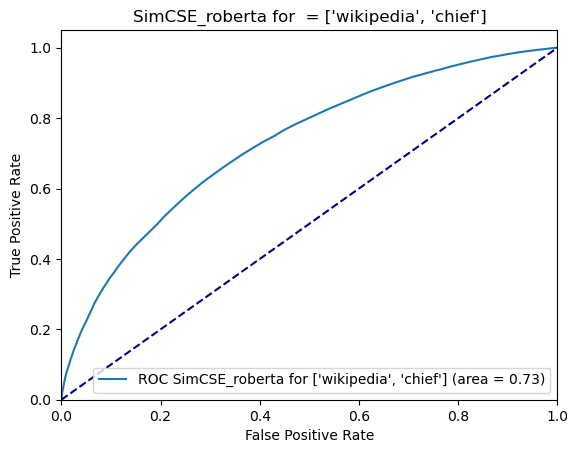

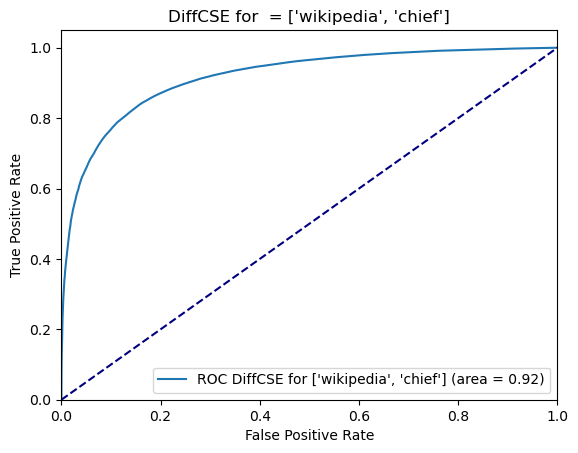

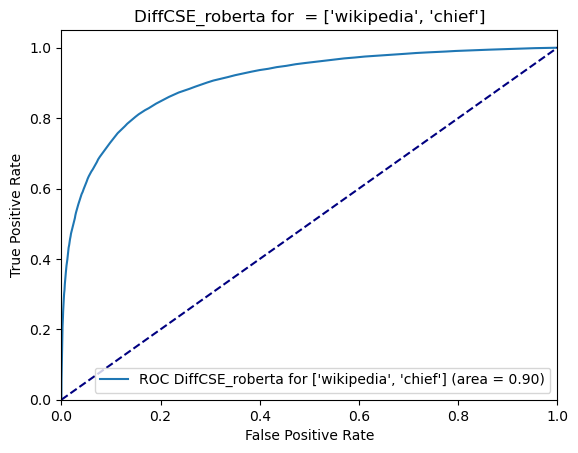

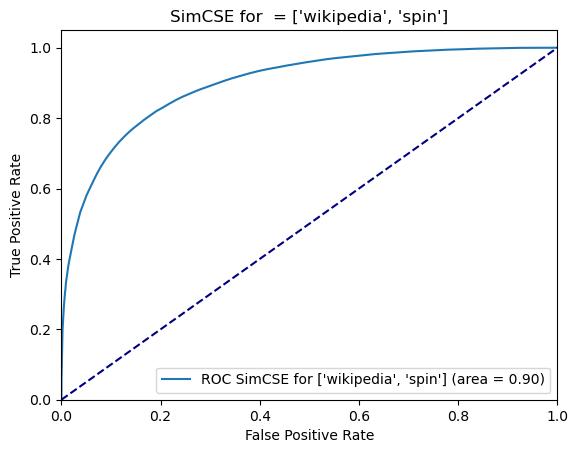

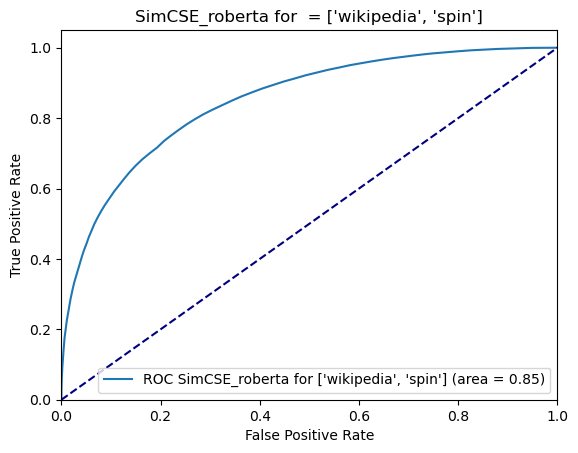

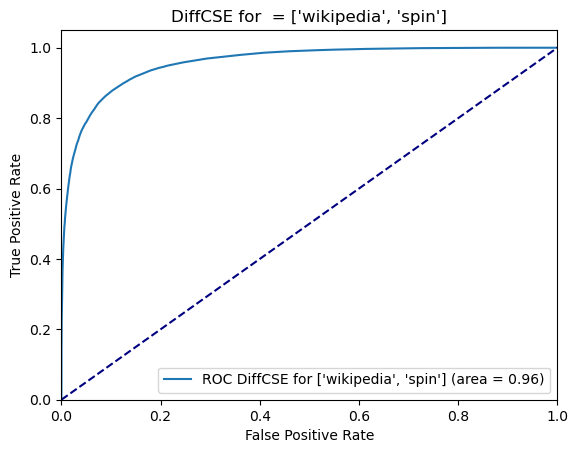

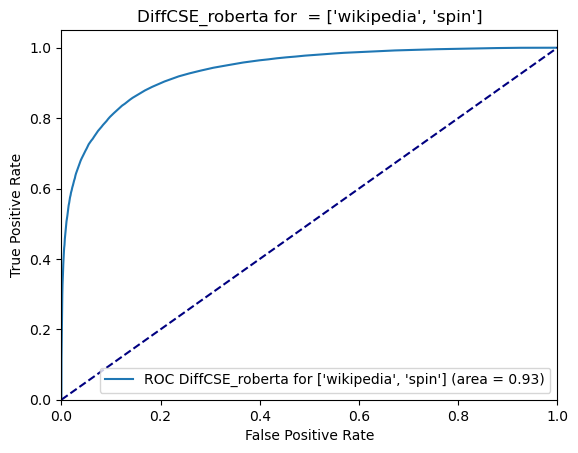

In [ ]:
for method in all_couple:
    roc_sep_doudle(test_result_old,method)